<a href="https://colab.research.google.com/github/flairmix/11299_KLG_HVAC/blob/main/11299_KLG_AB_HVAC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from matplotlib import pyplot as plt 
from matplotlib import figure 



In [3]:
def pipeG(Q, t1=130, t2=70):
  """
  return consuption for pipe in t/h
  Q - Gcal/h - power,
  t1 - high temperature, 
  t2 - low temperature
  """
  G = round(1000* Q / (t1 - t2), 2)
  return G

In [4]:

t_outside = [-15, -10, -7, -5, -3, 0, 3, 5, 7]

Qheat = [110.1, 73.67, 80.53, 84.05, 115.5, 90.83, 120.9, 126.7, 132.7] #чиллер мощность
Qheat_loss = [63, 54, 49, 45, 42, 36, 31, 27, 24] #теплопотери

#тепмпература теплоносителя на греющей стороне (чиллер)
t1_heat = [32, 39, 43, 45, 49, 51, 54, 56, 57] 
t2_heat = [27, 34, 38, 40, 44, 46, 49, 51, 52]

#срезка на греющей стороне 
t1_heat_cut = [40, 40, 43, 45, 49, 50, 50, 50, 50] 
t2_heat_cut = [35, 35, 38, 40, 44, 45, 45, 45, 45]

Qcool = []


In [5]:

Q_heat_loss_room = [15.23, 1.3, 6.07, 4.46, 3.66, 2.91, 6.75, 5.59, 3.69, 4.92, 17.52]
Q_heat_fancoils = [2*11.16, 4.09, 3*9.2, 7.73*2, 7.73*2, 7.73*3, 4.37*2, 6.64, 9.2*3, 11.16*4, 11.1*5]

Q_cool_room = [22.13, 3.43, 19.46, 10.21, 10.96, 15.1, 9.72, 2.27, 18.77, 30.43, 43.53]
Q_cool_fancoils = [7.78*3, 3.74, 6.76*3, 5.48*2, 5.48*2, 5.48*3, 4.8*2, 4.34, 6.76*3, 7.78*4, 8.75*5]

rooms = ["Вестибюль", "Мастерская", "Спортзал", "Офис МГН", "Переговорная", "Комната отдыха аутсорсеров", "Кофе-поинт", "Комната отдыха", "Пом. Командировочных", "Пом. дежурных инженеров", "Офис"]


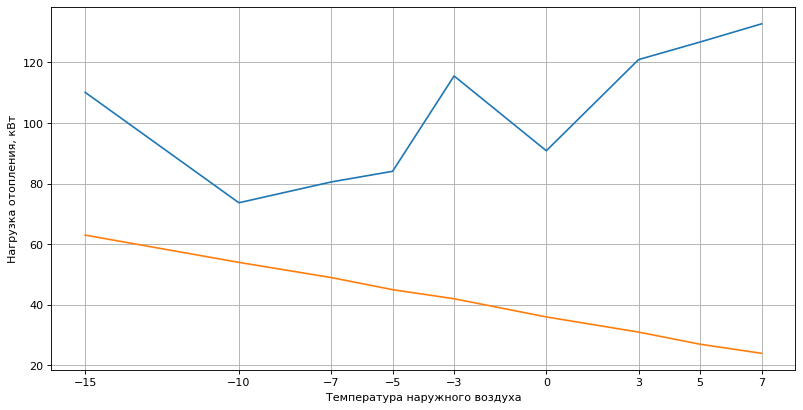

In [6]:
#Теплопроизводительность теплового насоса превосходит расчетные теплопотери


plt.figure(figsize=(12, 6), dpi=80)

plt.plot(t_outside, Qheat, "-")
plt.plot(t_outside, Qheat_loss, "-")

plt.grid(True)

plt.ylabel('Нагрузка отопления, кВт')
plt.xlabel('Температура наружного воздуха')

plt.xticks(t_outside)

plt.show()

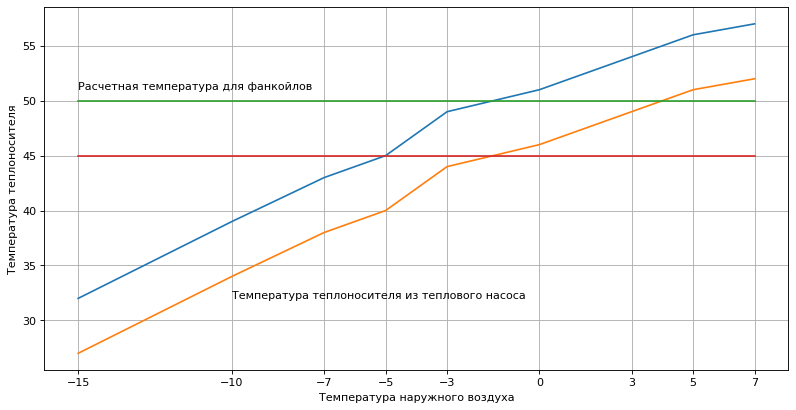

In [7]:
# При понижении температуры наружного воздуха снижается температура теплоносителя

plt.figure(figsize=(12, 6), dpi=80)

plt.plot(t_outside, t1_heat, "-")
plt.plot(t_outside, t2_heat, "-")


plt.plot(t_outside, [50 for i in range(len(t_outside))], "-")
plt.plot(t_outside, [45 for i in range(len(t_outside))], "-")


# plt.plot(t_outside, t1_heat_cut, "-")
# plt.plot(t_outside, t2_heat_cut, "-")


plt.grid(True)

plt.xlabel('Температура наружного воздуха')
plt.ylabel('Температура теплоносителя')

plt.xticks(t_outside)

plt.text(-15, 51, "Расчетная температура для фанкойлов")
plt.text(-10, 32, "Температура теплоносителя из теплового насоса")


plt.show()

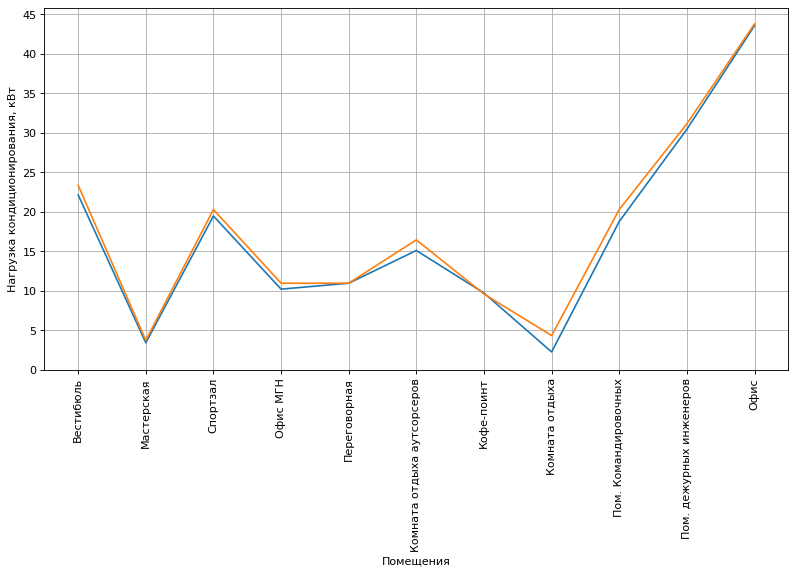

In [8]:
#подбор фанкойлов по производительности по холоду 


plt.figure(figsize=(12, 6), dpi=80)

plt.plot(rooms, Q_cool_room,"-")
plt.plot(rooms, Q_cool_fancoils,"-")

plt.grid(True)

plt.ylabel('Нагрузка кондиционирования, кВт')
plt.xlabel('Помещения')

plt.xticks(rotation=90)
plt.yticks([i for i in range(0, 50, 5)])

plt.show()

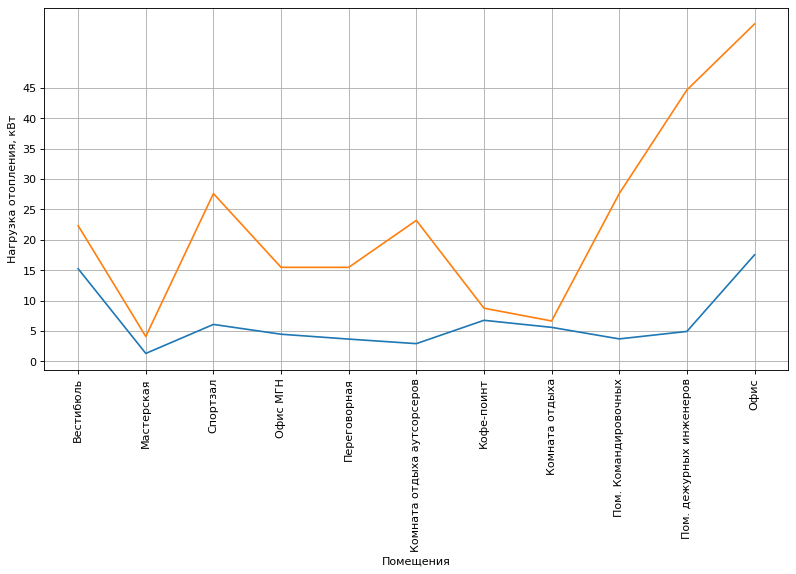

In [9]:
#мощность фанкойлов по теплу при расчетной температуре теплоносителя 45-40


plt.figure(figsize=(12, 6), dpi=80)

plt.plot(rooms, Q_heat_loss_room,"-")
plt.plot(rooms, Q_heat_fancoils,"-")

plt.grid(True)

plt.ylabel('Нагрузка отопления, кВт')
plt.xlabel('Помещения')

plt.xticks(rotation=90)
plt.yticks([i for i in range(0, 50, 5)])



plt.show()

In [10]:
import pandas as pd

In [11]:
daikin_G1 = []
daikin_t1 = [32]
daikin_t2 = []



columns = ['t_out', 'Qт', 'Qch','Gch','t1', 't2', 'G2','t10', 't11', 't12']
data = pd.DataFrame(columns=columns)

data['t_out'] = t_outside
data['Qт'] = Qheat_loss
data['Qch'] = Qheat

data['Gch'] = data.Qch.map(lambda p: pipeG(p/1163, 45, 40))
data['t1'] = t1_heat
data['t2'] = t2_heat
data['G2'] = [15 for i in range(len(t_outside))]
data['t10'] = [40 for i in range(len(t_outside))]
data['t11'] = [0 for i in range(len(t_outside))]
data['t12'] = [45 for i in range(len(t_outside))]





data

,t_out,Qт,Qch,Gch,t1,t2,G2,t10,t11,t12
0,-15,63,110.10,18.93,32,27,15,40,0,45
1,-10,54,73.67,12.67,39,34,15,40,0,45
2,-7,49,80.53,13.85,43,38,15,40,0,45
3,-5,45,84.05,14.45,45,40,15,40,0,45
4,-3,42,115.50,19.86,49,44,15,40,0,45
5,0,36,90.83,15.62,51,46,15,40,0,45
6,3,31,120.90,20.79,54,49,15,40,0,45
7,5,27,126.70,21.79,56,51,15,40,0,45
8,7,24,132.70,22.82,57,52,15,40,0,45
